In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB 


In [2]:
df=pd.read_csv('Covid Data.csv')

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
for i in df.columns.tolist():
  print(i,', ')

USMER , 
MEDICAL_UNIT , 
SEX , 
PATIENT_TYPE , 
DATE_DIED , 
INTUBED , 
PNEUMONIA , 
AGE , 
PREGNANT , 
DIABETES , 
COPD , 
ASTHMA , 
INMSUPR , 
HIPERTENSION , 
OTHER_DISEASE , 
CARDIOVASCULAR , 
OBESITY , 
RENAL_CHRONIC , 
TOBACCO , 
CLASIFFICATION_FINAL , 
ICU , 


In [5]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [6]:
df.shape

(1048575, 21)

*Number* of Unique values by column

In [7]:
for i in df.columns:
  print('{:<20} => {:>10}'.format(i,len(df[i].unique())))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        401
INTUBED              =>          4
PNEUMONIA            =>          3
AGE                  =>        121
PREGNANT             =>          4
DIABETES             =>          3
COPD                 =>          3
ASTHMA               =>          3
INMSUPR              =>          3
HIPERTENSION         =>          3
OTHER_DISEASE        =>          3
CARDIOVASCULAR       =>          3
OBESITY              =>          3
RENAL_CHRONIC        =>          3
TOBACCO              =>          3
CLASIFFICATION_FINAL =>          7
ICU                  =>          4


percentage of missing value

In [8]:
print('Percentage of missing values')
for i in df.columns :
    print('{:<20} => {:>10.2f}%'.format(i, len(df[(df[i]==98) | (df[i]==99) | (df[i]==97)])/len(df)*100))

Percentage of missing values
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
DATE_DIED            =>       0.00%
INTUBED              =>      81.62%
PNEUMONIA            =>       1.53%
AGE                  =>       0.03%
PREGNANT             =>      50.28%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>      81.64%


In [9]:
df['INTUBED'].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [10]:
df['ICU'].value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [11]:
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

INTUBED, PREGNANT, ICU : have many missing values, indicated by 97,99

other columns have smaller missing values, indicated by 98

In [12]:
df['CLASIFFICATION_FINAL'].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

97-99:Indicates missings,so classification has no missing value

1-3:the patient was diagnosed with covid in different degrees

4-7 : the patient is not a carrier of covid or that the test is inconclusive

Data Preprocessing

Get rid of missing values

except for INTUBED, PREGNANT, ICU columns since they have too many missing values

In [13]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [14]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for i in cols :
    df = df [(df[i] == 1)|(df[i] == 2)]

In [15]:
df ['DEATH'] = [2 if row=='9999-99-99' else 1 for row in df['DATE_DIED']]

In [16]:
df['DEATH'].value_counts()

2    950438
1     74714
Name: DEATH, dtype: int64

In [17]:
df.drop(columns=['INTUBED','ICU','DATE_DIED'],inplace=True)

In [18]:
print('MALE',df.query('SEX==2')['PREGNANT'].value_counts(), sep='\n')
print('FEMALE',df.query('SEX==1')['PREGNANT'].value_counts(), sep='\n')

MALE
97    511936
Name: PREGNANT, dtype: int64
FEMALE
2     502200
1       7841
98      3175
Name: PREGNANT, dtype: int64


In [19]:
df['PREGNANT'] = df['PREGNANT'].replace(97,2)
df['PREGNANT'] = df['PREGNANT'].replace(98,2)

In [20]:
df.shape

(1025152, 19)

In [21]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1


DataFrame length reduced from 1,048,575 to 1,025,152

In [22]:
for col in df.columns : 
    print('{:<20} => {:>10}'.format(col, len(df[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
PNEUMONIA            =>          2
AGE                  =>        121
PREGNANT             =>          2
DIABETES             =>          2
COPD                 =>          2
ASTHMA               =>          2
INMSUPR              =>          2
HIPERTENSION         =>          2
OTHER_DISEASE        =>          2
CARDIOVASCULAR       =>          2
OBESITY              =>          2
RENAL_CHRONIC        =>          2
TOBACCO              =>          2
CLASIFFICATION_FINAL =>          7
DEATH                =>          2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025152 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1025152 non-null  int64
 1   MEDICAL_UNIT          1025152 non-null  int64
 2   SEX                   1025152 non-null  int64
 3   PATIENT_TYPE          1025152 non-null  int64
 4   PNEUMONIA             1025152 non-null  int64
 5   AGE                   1025152 non-null  int64
 6   PREGNANT              1025152 non-null  int64
 7   DIABETES              1025152 non-null  int64
 8   COPD                  1025152 non-null  int64
 9   ASTHMA                1025152 non-null  int64
 10  INMSUPR               1025152 non-null  int64
 11  HIPERTENSION          1025152 non-null  int64
 12  OTHER_DISEASE         1025152 non-null  int64
 13  CARDIOVASCULAR        1025152 non-null  int64
 14  OBESITY               1025152 non-null  int64
 15  RENAL_CHRONIC  

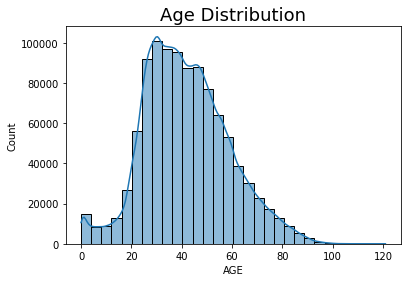

In [24]:
plt.title('Age Distribution', fontsize=18)
sns.histplot(data=df, x=df['AGE'],bins=30, kde=True)

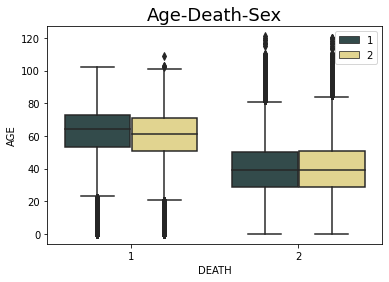

In [25]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18)
plt.legend(loc="best")

Text(0.5, 1.0, 'Correlation Between Features')

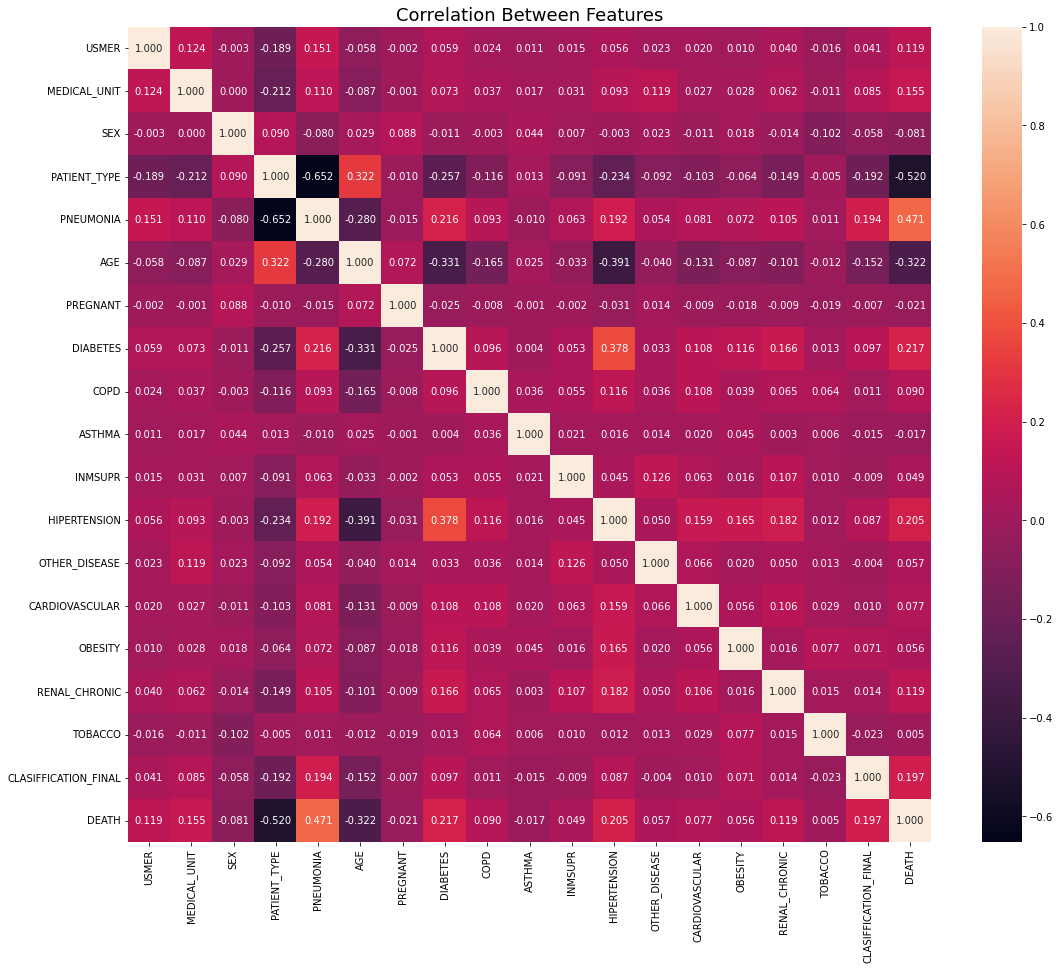

In [26]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, fmt='.3f')
plt.title('Correlation Between Features', fontsize=18)

Drop values that doesn't have a positive correlataion with DEATH column

Scale Numeric feature(i.e. Age)

In [27]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df['AGE'] = standard_scaler.fit_transform(df.loc[:,['AGE']])

Determine X,Y data

In [28]:
y = df['DEATH']
x = df.drop('DEATH', axis=1)

In [29]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1) #80% for training and 20% 
#for testing

print('Train X :', train_x.shape)
print('Test X :', test_x.shape)
print('Train Y :', train_y.shape)
print('Test Y :', test_y .shape)

Train X : (820121, 18)
Test X : (205031, 18)
Train Y : (820121,)
Test Y : (205031,)


Logistic Regression Accuracy

In [30]:
LG=LogisticRegression()
LG.fit(train_x,train_y)
print("Logistic Regression Accuracy :", LG.score(test_x, test_y))

Logistic Regression Accuracy : 0.937984987636016


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 score - F1 Score is the weighted average of Precision and Recall.

In [31]:
print("Logistic Regression F1 Score : ", f1_score(test_y, LG.predict(test_x),average=None))

Logistic Regression F1 Score :  [0.51064157 0.96689483]


Logistic Regression Heat Map

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

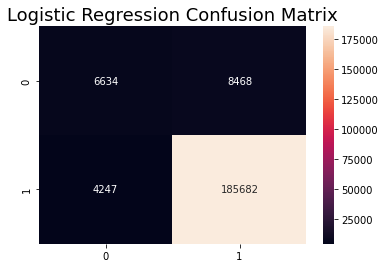

In [32]:
sns.heatmap(confusion_matrix(test_y, LG.predict(test_x)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

Test on other models

Decision Tree

In [33]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1) # 80% training and 20% test

print('Train X :', train_x.shape)
print('Test X :', test_x.shape)
print('Train Y :', train_y.shape)
print('Test Y :', test_y .shape)

Train X : (820121, 18)
Test X : (205031, 18)
Train Y : (820121,)
Test Y : (205031,)


In [34]:
clf = DecisionTreeClassifier()
clf = clf.fit(train_x,train_y)
print("Decision tree Accuracy :", clf.score(test_x, test_y))

Decision tree Accuracy : 0.9286107954406895


Decision Tree F1 Score

In [35]:
print("Decision Tree F1 Score : ", f1_score(test_y, clf.predict(test_x),average=None))

Decision Tree F1 Score :  [0.51859891 0.96144678]


Decision Tree Heat Map

Text(0.5, 1.0, 'Decision Tree Classifier')

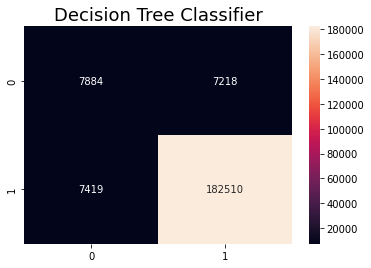

In [36]:
sns.heatmap(confusion_matrix(test_y,clf.predict(test_x)), annot=True, fmt='.0f')
plt.title("Decision Tree Classifier", fontsize=18)

Naive Bayes

In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature

In [37]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1) # 80% training and 20% test

print('Train X :', train_x.shape)
print('Test X :', test_x.shape)
print('Train Y :', train_y.shape)
print('Test Y :', test_y .shape)

Train X : (820121, 18)
Test X : (205031, 18)
Train Y : (820121,)
Test Y : (205031,)


In [38]:
gnb = GaussianNB()
gnb.fit(train_x, train_y)
print("Gausiian Naive Bayes Accuracy :", gnb.score(test_x, test_y))

Gausiian Naive Bayes Accuracy : 0.8797547687910608


Gausiian Naive Bayes F1 Score

In [39]:
print("Gausiian Naive Bayes F1 Score : ", f1_score(test_y, gnb.predict(test_x),average=None))

Gausiian Naive Bayes F1 Score :  [0.49882095 0.93168177]


Gausiian Naive Bayes Heat Map

Text(0.5, 1.0, 'Gaussian Naive Bayes')

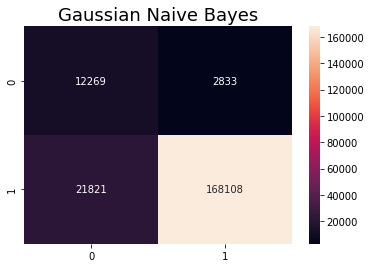

In [40]:
sns.heatmap(confusion_matrix(test_y,gnb.predict(test_x)), annot=True, fmt='.0f')
plt.title("Gaussian Naive Bayes", fontsize=18)

Bernoulli Naive Bayes: In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence(i.e. a word occurs in a document or not) features are used rather than term frequencies(i.e. frequency of a word in the document).

In [41]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1) # 80% training and 20% test

print('Train X :', train_x.shape)
print('Test X :', test_x.shape)
print('Train Y :', train_y.shape)
print('Test Y :', test_y .shape)

Train X : (820121, 18)
Test X : (205031, 18)
Train Y : (820121,)
Test Y : (205031,)


In [42]:
Bnb = BernoulliNB()
Bnb.fit(train_x, train_y)
print("Bernoulli Naive Bayes Accuracy :", Bnb.score(test_x, test_y))

Bernoulli Naive Bayes Accuracy : 0.9263428457160137


Bernoulli Naive Bayes F1 Score

In [43]:
print("Bernoulli Naive Bayes F1 Score : ", f1_score(test_y, Bnb.predict(test_x),average=None))

Bernoulli Naive Bayes F1 Score :  [0.         0.96176322]


Bernoulli Naive Bayes Heat Map

Text(0.5, 1.0, 'Bernoulli Bayes')

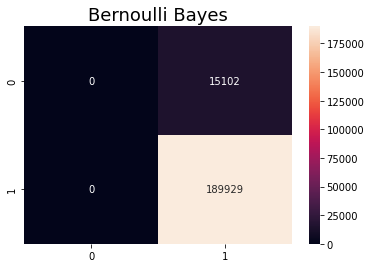

In [46]:
sns.heatmap(confusion_matrix(test_y,Bnb.predict(test_x)), annot=True, fmt='.0f')
plt.title("Bernoulli Bayes", fontsize=18)

Logistic Regression Model seems to have better sensitivity

**Conclusion**


* predict patients who are at high risk of death from covid.
* uses undersampling method to solve imbalance dataset problem.
* tested Logistic Regression,Decision Tree,Gaussian Naive Bayes and Bernouli Naive Bayes algorithm.
* logistic regression seemed to have better sensitivity than Decision Tree,Gaussian Naive Bayes and Bernouli Naive Bayes algorithm.